# Yelp Business: EDA

The objective of this notebook is to explore the underlying data distribution of the businesses dataset post feature engineering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from collections import Counter, OrderedDict
import utils, plot_help

%matplotlib inline

In [2]:
#download data
df_bus = utils.chunk_loader('data/cleaned/business_merge_density_added.csv')
#head
df_bus.head()

,address,attributes,business_id,categories,city,hours,latitude,longitude,name,postal_code,...,first,last,span_checkin,median_income,chain,density,review_density,stars_density,price_density,is_open
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,NaN,0.585072,-1.955091,Arizona Biltmore Golf Club,0,...,2012-06-16 14:53:33,2016-06-18 16:22:16,5323,3.5,0,478,-0.434461,-0.791592,-1.006364,0
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",0.761060,-1.390195,Emerald Chinese Restaurant,1,...,2010-07-05 16:56:31,2018-11-09 21:08:54,15143,3.0,0,325,2.886616,-0.815147,0.396256,1
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",0.612481,-1.411258,Musashi Japanese Restaurant,2,...,2010-11-13 01:00:36,2018-11-10 17:15:54,58518,3.5,0,460,3.080444,0.645325,0.696276,1
3,"15655 W Roosevelt St, Ste 237",NaN,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",0.583911,-1.961673,Farmers Insurance - Paul Lorenz,3,...,2012-10-29 22:36:50,2016-04-27 00:57:54,8464,3.5,0,210,-0.544127,1.655468,-1.239378,1
4,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd","{'BusinessParking': ""{'garage': False, 'street...",68dUKd8_8liJ7in4aWOSEA,"Shipping Centers, Couriers & Delivery Services...",Mississauga,"{'Monday': '9:0-19:0', 'Tuesday': '9:0-20:0', ...",0.760954,-1.391230,The UPS Store,5,...,2014-03-31 21:46:17,2018-05-22 22:35:48,2971,3.0,1,234,-0.521945,-0.928338,0.558867,1


In [3]:
print(*df_bus.columns, sep=',  ')

address,  attributes,  business_id,  categories,  city,  hours,  latitude,  longitude,  name,  postal_code,  review_count,  stars,  state,  road_type,  GoodForKids,  RestaurantsReservations,  Caters,  RestaurantsTableService,  RestaurantsTakeOut,  RestaurantsPriceRange2,  OutdoorSeating,  BikeParking,  HasTV,  RestaurantsGoodForGroups,  RestaurantsDelivery,  BusinessAcceptsCreditCards,  BusinessAcceptsBitcoin,  ByAppointmentOnly,  AcceptsInsurance,  GoodForDancing,  CoatCheck,  HappyHour,  WheelchairAccessible,  DogsAllowed,  DriveThru,  Corkage,  BYOB,  Open24Hours,  RestaurantsCounterService,  dessert,  latenight,  lunch,  dinner,  brunch,  breakfast,  garage,  street,  validated,  lot,  valet,  romantic,  intimate,  classy,  hipster,  divey,  touristy,  trendy,  upscale,  casual,  dj,  background_music,  no_music,  jukebox,  live,  video,  karaoke,  monday,  tuesday,  friday,  wednesday,  thursday,  sunday,  saturday,  straightperms,  coloring,  extensions,  africanamerican,  curly,

In [4]:
def df_plot_count(df, col_drop, df_name,k=20,savepath=None, hue=None):
    """
    plots the count of top values in a 1/0 time dataframe
    df = pandas dataframe
    col_drop = list of string name of columns to drop
    savepath = path to save to
    """
    
    #sum up by column
    val_count = df.drop(columns=col_drop).sum(axis=0).sort_values(ascending=False)
    
    #avoid error for slicing beyond index
    if len(val_count)<k:
        k = len(val_count)
    
    top_k_valcount = val_count[0:k]
    
    
    plt.figure(figsize=(15,5))
    sns.barplot(top_k_valcount.index, top_k_valcount.values, alpha=0.8, order=top_k_valcount.index, hue=hue)
    plt.title('Yelp Top {} Features for {}'.format(k, df_name))
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(df_name, fontsize=12)
    plt.xticks(rotation=90)
    
    if savepath:
        plt.savefig(savepath)
    
    plt.show()
    

In [5]:
def plot_count_top_k(df, col, k=20,savepath=None, hue=None):
    """
    plots the top k value counts in a dataframe
    df = pandas dataframe
    col = string name of columns   
    k = top k integer values
    savepath = path to save to
    """
    
    val_count = df[col].value_counts()
    
    #avoid error for slicing beyond index
    if len(val_count)<k:
        k = len(val_count)
    
    top_k_valcount = val_count[0:k]
    
    
    plt.figure(figsize=(15,5))
    sns.barplot(top_k_valcount.index, top_k_valcount.values, alpha=0.8, order=top_k_valcount.index, hue=hue)
    plt.title('Yelp top {} {}'.format(k, col))
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(rotation=90)
    
    if savepath:
        plt.savefig(savepath)
    
    plt.show()
    

## Which Cities Have the Most Businesses?

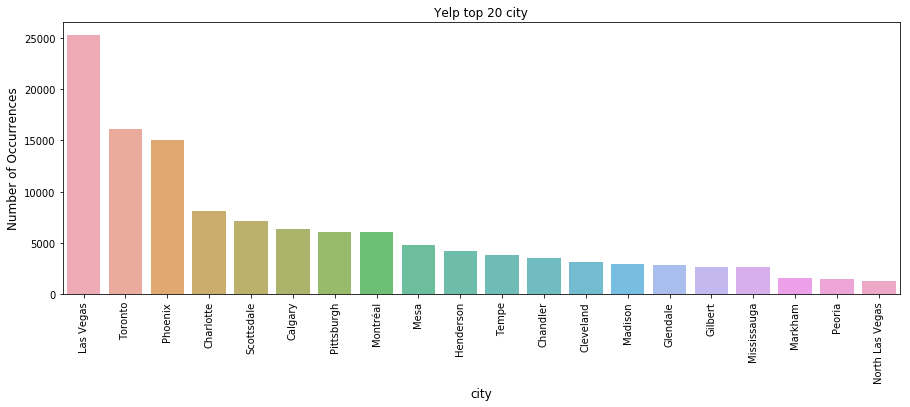

In [6]:
plot_count_top_k(df_bus, 'city', savepath='plots/business_top_city.png')

## Which States Have the Most Businesses?

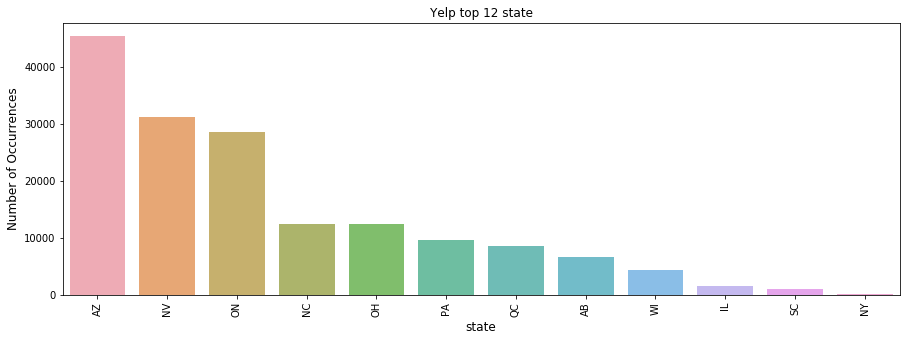

In [7]:
plot_count_top_k(df_bus, 'state', k=12, savepath='plots/business_top_state.png')

## Which Postal Codes Have the Most Businesses?

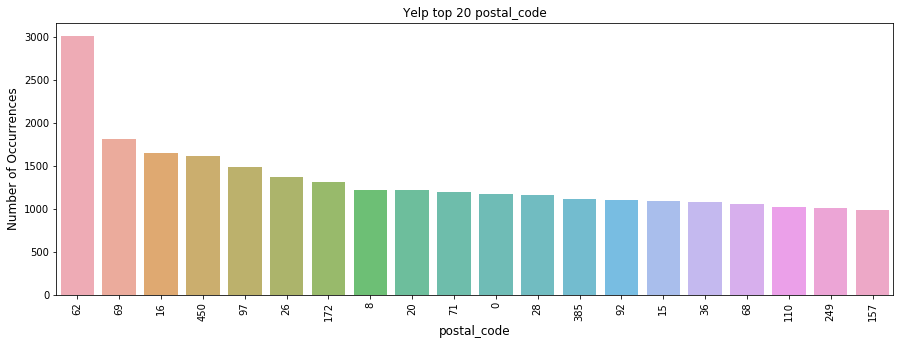

In [8]:
plot_count_top_k(df_bus, 'postal_code',savepath='plots/business_top_zip.png')

## How Are Stars Distributed?

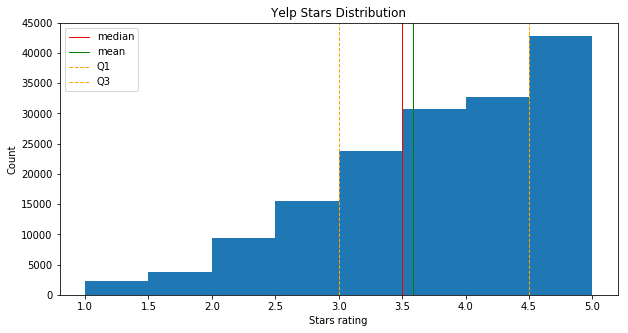

In [9]:
plt.figure(figsize=(10,5))
plt.hist(df_bus['stars'], bins=np.arange(1,5.5,0.5))
plt.xticks(np.arange(1,5.5,0.5))
plt.xlabel('Stars rating')
plt.ylabel("Count")

#stats
plt.axvline(df_bus['stars'].median(), color='red',linestyle='solid', linewidth=1, label='median')
plt.axvline(df_bus['stars'].mean(), color='green',linestyle='solid', linewidth=1, label='mean')
plt.axvline(df_bus.stars.describe()['25%'], color='orange',linestyle='dashed', linewidth=1, label='Q1')
plt.axvline(df_bus.stars.describe()['75%'], color='orange',linestyle='dashed', linewidth=1, label='Q3')


plt.legend()
plt.title("Yelp Stars Distribution")
plt.savefig('plots/business_stars.png')
plt.show()

## Open Vs Close

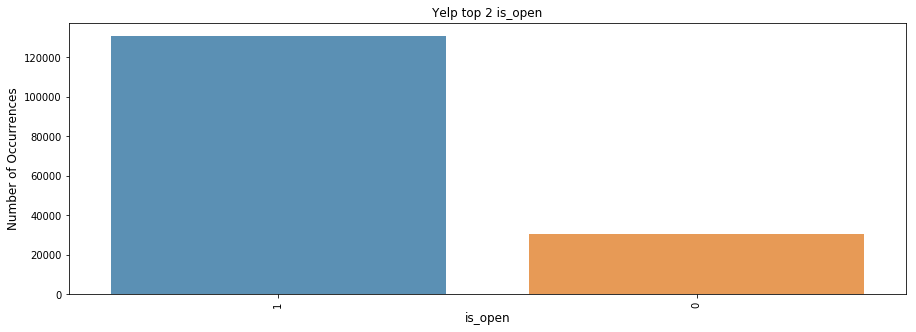

In [10]:
plot_count_top_k(df_bus, 'is_open',savepath='plots/business_isopen.png')

### Within the type of business (restaurants, spa, beauty, etc...) we want to see  the distribution of open/close businesses among these

In [11]:
cats = ['Restaurants',  'Food',  'Shopping',  
        'Home',  'Spas',  'Bars',  'Beauty',  
        'Medical',  'Health',  'Hair']

df_cats = df_bus[cats+['is_open']].copy()
df_close = df_cats.groupby(by='is_open', axis=0).sum()
df_close = df_close.T
# df_close = df_close.reset_index()
#df_close['open_ratio'] = df_close[1]/(df_close[0]+df_close[1])
df_close['total'] = df_close[0] + df_close[1]
df_close = df_close.sort_values(by='total', ascending=False)
df_close

is_open,0,1,total
Restaurants,16037,41264,57301
Food,7339,27920,35259
Shopping,4536,22772,27308
Spas,2389,13953,16342
Beauty,2389,13953,16342
Bars,4106,10930,15036
Health,1195,13265,14460
Medical,1083,12781,13864
Home,1267,11996,13263
Hair,1161,7087,8248


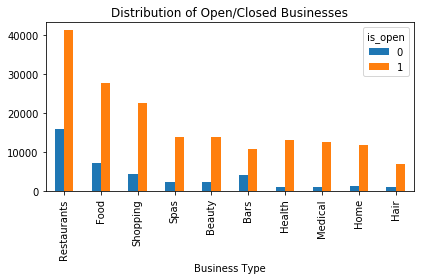

In [12]:
df_close[[0, 1]].plot.bar()
plt.xlabel("Business Type")
plt.title("Distribution of Open/Closed Businesses")
plt.savefig('plots/business_isopen_cats.png')
plt.tight_layout()
plt.show()

## Road Type

In [13]:
#load the datafram
road_type_df = pd.read_csv('data/cleaned/business_roadtype.csv', index_col=0)
road_type_df.head()

,dr,hwy,pkwy,ln,ct,road,str,ave,boulevard,business_id
0,1,0,0,0,0,0,0,0,0,1SWheh84yJXfytovILXOAQ
1,0,0,0,0,0,0,0,1,0,QXAEGFB4oINsVuTFxEYKFQ
2,0,0,0,0,0,1,0,0,0,gnKjwL_1w79qoiV3IC_xQQ
3,0,0,0,0,0,0,0,0,0,xvX2CttrVhyG2z1dFg_0xw
4,1,0,0,0,0,0,0,0,1,HhyxOkGAM07SRYtlQ4wMFQ


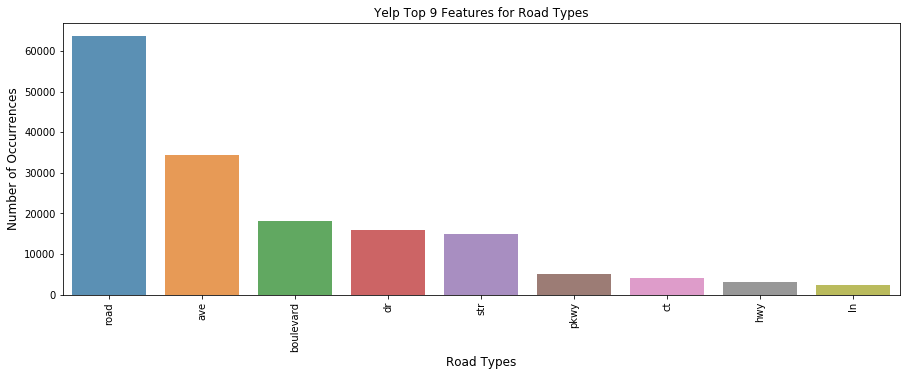

In [14]:
df_plot_count(road_type_df, ['business_id'], 'Road Types',savepath='plots/business_roads.png')

## Attributes

In [15]:
#load the datafram
df_atr = pd.read_csv('data/cleaned/business_attributes.csv', index_col=0)
df_atr.head()

,GoodForKids,RestaurantsReservations,Caters,RestaurantsTableService,RestaurantsTakeOut,RestaurantsPriceRange2,OutdoorSeating,BikeParking,HasTV,RestaurantsGoodForGroups,...,soy_free,vegetarian,NoiseLevel,WiFi,Alcohol,RestaurantsAttire,BYOBCorkage,Smoking,AgesAllowed,business_id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1SWheh84yJXfytovILXOAQ
1,1,1,1,1,1,2,0,0,0,1,...,0,0,3,1,2,1,0,0,0,QXAEGFB4oINsVuTFxEYKFQ
2,1,1,0,1,1,2,0,1,1,1,...,0,0,2,1,1,1,0,0,0,gnKjwL_1w79qoiV3IC_xQQ
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,xvX2CttrVhyG2z1dFg_0xw
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,HhyxOkGAM07SRYtlQ4wMFQ


In [16]:
df_atr.describe()

,GoodForKids,RestaurantsReservations,Caters,RestaurantsTableService,RestaurantsTakeOut,RestaurantsPriceRange2,OutdoorSeating,BikeParking,HasTV,RestaurantsGoodForGroups,...,halal,soy_free,vegetarian,NoiseLevel,WiFi,Alcohol,RestaurantsAttire,BYOBCorkage,Smoking,AgesAllowed
count,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000,...,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000
mean,0.276882,0.104601,0.107295,0.055657,0.293278,1.024236,0.113920,0.344382,0.132891,0.246209,...,0.000016,0.000005,0.000088,0.444398,0.528065,0.243249,0.260829,0.013385,0.028446,0.001973
std,0.447459,0.306039,0.309489,0.229258,0.455266,1.039346,0.317715,0.475167,0.339458,0.430803,...,0.003947,0.002279,0.009394,0.882325,1.025946,0.627039,0.459608,0.174419,0.228235,0.083945
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000


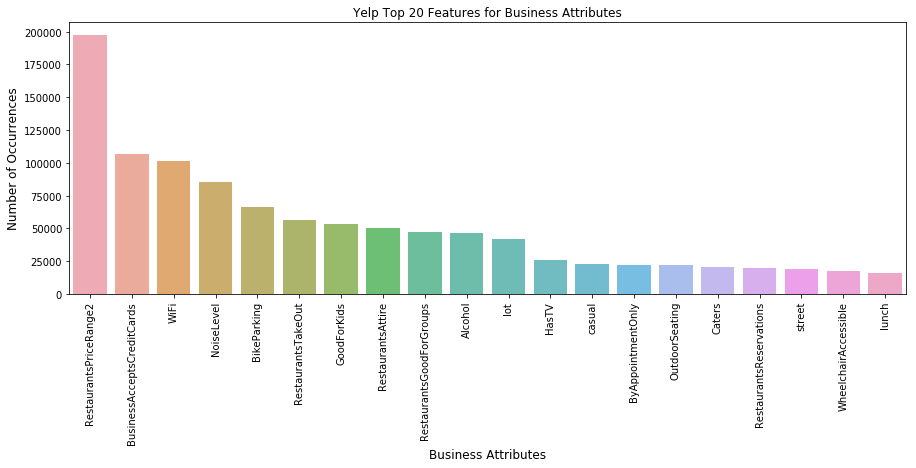

In [17]:
df_plot_count(df_atr, ['business_id'], 'Business Attributes',savepath='plots/business_attributes.png')

In [18]:
def df_binary_corr_plot(df, col_drop, k=20, title=None,savepath=None, fig_size = (15,15)):
    """
    Takes in a dataframe and plots the correlation matrix for top k columns based on feature presence
    df = pandas dataframe
    col_drop = columns to drop
    k = top k
    savepath = save directory
    fig_size = tuple for figure size
    """
    
    #sum  over rows minus dropped cols
    cats_sum = df.drop(columns=col_drop).sum(axis=0)
    
    #sort descending
    cats_sum_sorted = cats_sum.sort_values(ascending=False)
    
    #get top k column names
    cats_sum_topk = cats_sum_sorted.index[0:k]
    
    df_corr = df[cats_sum_topk].corr()
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(df_corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=fig_size)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(df_corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    if title:
        plt.title("{} Pearson Correlation Heatmap".format(title))

    if savepath:
        plt.savefig("plots/portfolio_corr.png")
    
    plt.show()
    
    

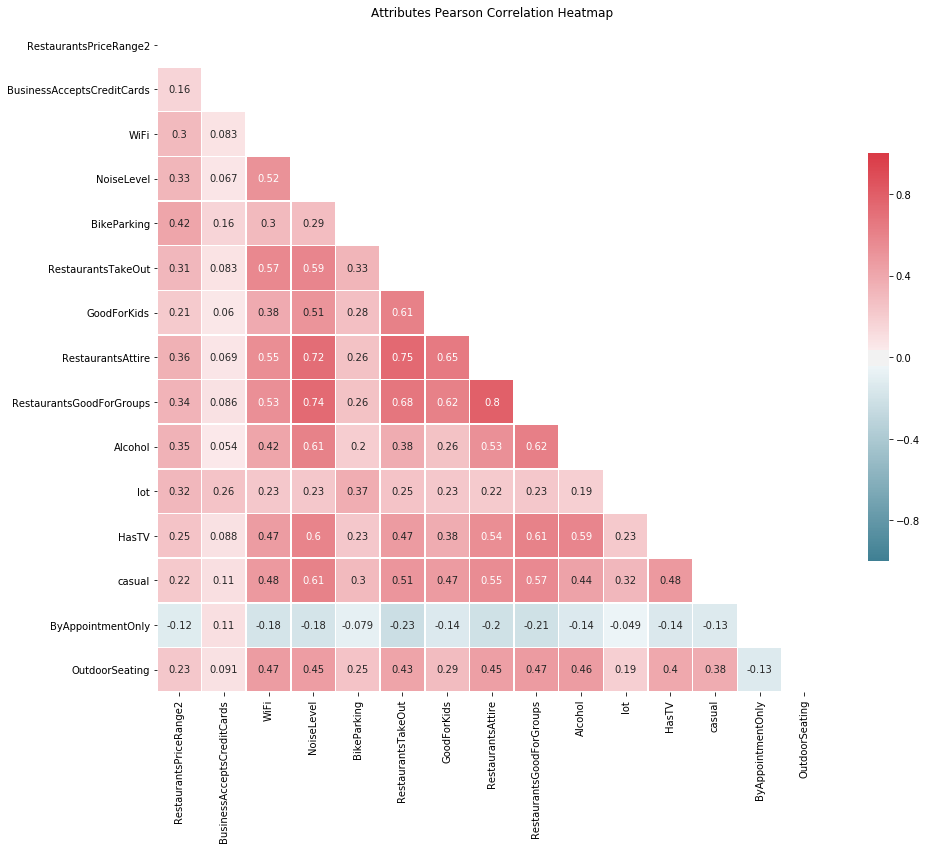

In [19]:
df_binary_corr_plot(df_atr, ['business_id'],
                    k=15,title='Attributes',
                    savepath='plots/business_attributes_corr.png')

### Recall that correlation does not necessarily imply causation!!